In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('../../dataset/clustering/clustering.csv')
feature_names = data.columns.tolist()
data

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalizacija podataka (`MinMaxScaler`)

In [3]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns.tolist())
data

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-means (2 klastera)

In [4]:
kmeans = KMeans(n_clusters=2, n_init='auto',random_state=42)
kmeans.fit(data)

KMeans(n_clusters=2, n_init='auto', random_state=42)

### Odnos dodeljenih klastera

In [5]:
clusters = kmeans.labels_

print(f'Broj instanci koje pripadaju jednom klasteru: {(clusters == 0).sum()}')
print(f'Broj instanci koje pripadaju drugom klasteru: {(clusters == 1).sum()}')

Broj instanci koje pripadaju jednom klasteru: 922
Broj instanci koje pripadaju drugom klasteru: 46404


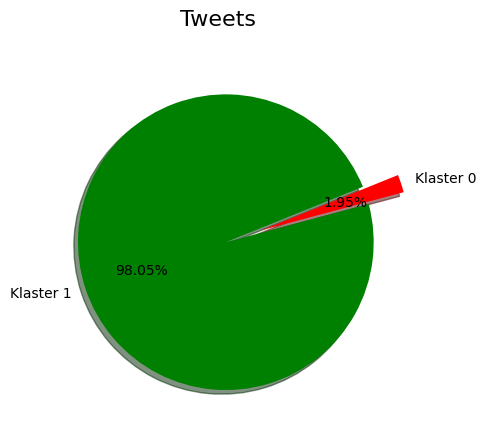

In [9]:
labels = ['Klaster 0', 'Klaster 1']

fig, ax = plt.subplots()
fig.suptitle(t='Tweets', fontsize=16)

ax.pie(
    x=[(clusters == 0).sum(), (clusters == 1).sum()],
    explode=(0.25, 0),
    labels=labels,
    colors=['Red', 'Green'],
    autopct='%.2f%%',
    shadow=True,
    startangle=15
);

# Vizualizacija podataka

In [14]:
def plot_clusters_2d(data: pd.DataFrame) -> None:
    clusters_plt = sns.scatterplot(
        data=data, 
        x='x', 
        y='y', 
        hue='cluster', 
        palette=['green', 'red']
    )

    clusters_plt.set(xlabel=None);
    clusters_plt.set(ylabel=None);

In [15]:
def plot_clusters_3d(data: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(7,7))
    
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(
        data['x'],
        data['y'],
        data['z'],
        marker='o',
        c=data['cluster'],
        s=20,
        cmap='RdBu'
    )

## PCA (2D)

Da bismo vizualizovali nase podatke potrebno je da smanjimo dimenziju koristeci PCA (za 2D koristicemo `n_components=2`)

In [16]:
pca_2d = PCA(n_components=2, random_state=42)
pca_2d_vals = pca_2d.fit_transform(data.values)

In [17]:
pca_2d_df = pd.DataFrame(pca_2d_vals, columns=['x', 'y'])
pca_2d_df['cluster'] = clusters
pca_2d_df

,x,y,cluster
0,-0.013147,-0.013254,1
1,-0.007348,-0.032045,1
2,-0.011843,-0.011783,1
3,-0.013819,-0.015786,1
4,-0.011362,-0.009681,1
...,...,...,...
47321,-0.009633,-0.005087,1
47322,-0.011010,-0.004841,1
47323,-0.010511,-0.008236,1
47324,-0.013864,0.011118,1


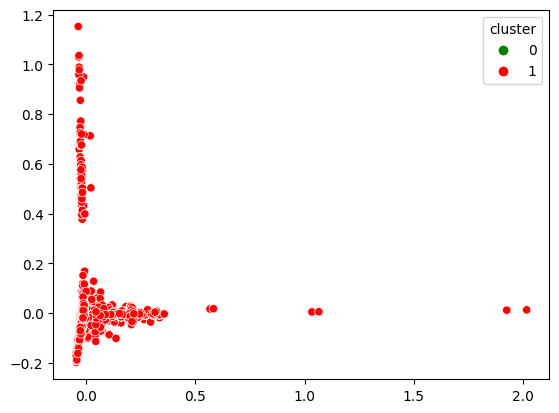

In [18]:
plot_clusters_2d(pca_2d_df)

## PCA (3D)

In [19]:
pca_3d = PCA(n_components=3, random_state=42)
pca_3d_vals = pca_3d.fit_transform(data.values)

In [20]:
pca_3d_df = pd.DataFrame(pca_3d_vals, columns=['x', 'y', 'z'])
pca_3d_df['cluster'] = clusters
pca_3d_df

,x,y,z,cluster
0,-0.013156,-0.013684,-0.010957,1
1,-0.007373,-0.030783,0.012306,1
2,-0.011831,-0.011653,-0.001471,1
3,-0.013777,-0.015776,-0.028056,1
4,-0.011364,-0.009775,-0.007409,1
...,...,...,...,...
47321,-0.009633,-0.005401,-0.017186,1
47322,-0.011011,-0.004888,-0.015841,1
47323,-0.010501,-0.008255,-0.006062,1
47324,-0.013854,0.010897,-0.027472,1


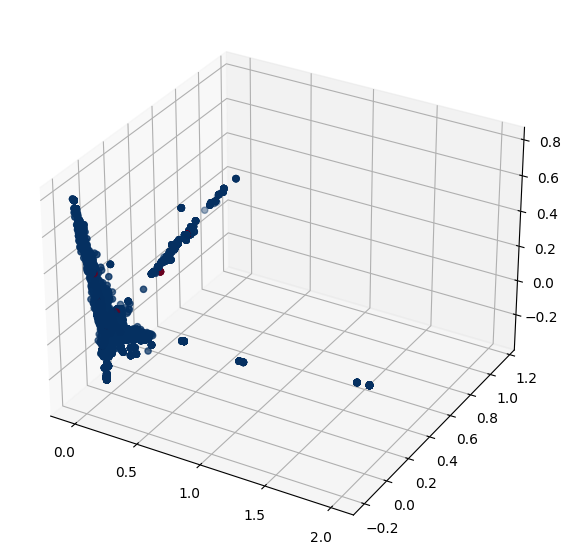

In [21]:
plot_clusters_3d(pca_3d_df)

Za smanjenje dimenzionalnosti kada je slucaj obrade teksta u pitanju moze se koristiti i `TruncatedSVD` (radi sa podacima iz TF-IDF matrice koju vraca TfidfVectorizer)

## TruncatedSVD (2D)

In [22]:
tsvd_2d = TruncatedSVD(n_components=2, random_state=42)
tsvd_2d_vals = tsvd_2d.fit_transform(data.values)

In [23]:
tsvd_2d_df = pd.DataFrame(tsvd_2d_vals, columns=['x', 'y'])
tsvd_2d_df['cluster'] = clusters
tsvd_2d_df

,x,y,cluster
0,0.006638,0.047846,1
1,0.022881,0.099697,1
2,0.001880,0.024870,1
3,0.004545,0.043945,1
4,0.002032,0.021709,1
...,...,...,...
47321,0.004935,0.024306,1
47322,0.003211,0.025902,1
47323,0.001149,0.014309,1
47324,0.007287,0.057605,1


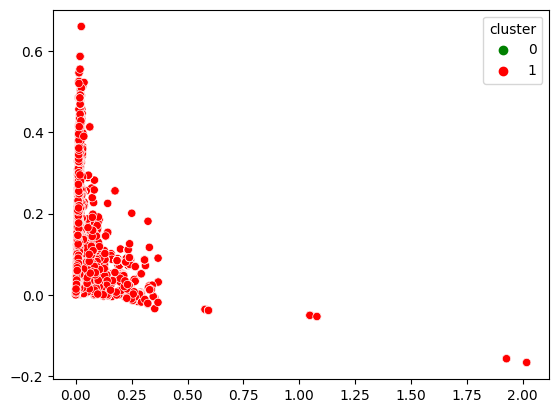

In [24]:
plot_clusters_2d(tsvd_2d_df)

## TruncatedSVD (3D)

In [25]:
tsvd_3d = TruncatedSVD(n_components=3, random_state=42)
tsvd_3d_vals = tsvd_3d.fit_transform(data.values)

In [26]:
tsvd_3d_df = pd.DataFrame(tsvd_3d_vals, columns=['x', 'y', 'z'])
tsvd_3d_df['cluster'] = clusters
tsvd_3d_df

,x,y,z,cluster
0,0.006611,0.049387,-0.024022,1
1,0.023085,0.109262,-0.061538,1
2,0.001918,0.026534,-0.016616,1
3,0.004594,0.045300,-0.024703,1
4,0.002020,0.022591,-0.012910,1
...,...,...,...,...
47321,0.004928,0.024682,-0.007812,1
47322,0.003194,0.026662,-0.008335,1
47323,0.001169,0.015062,-0.009404,1
47324,0.007294,0.057866,0.001140,1


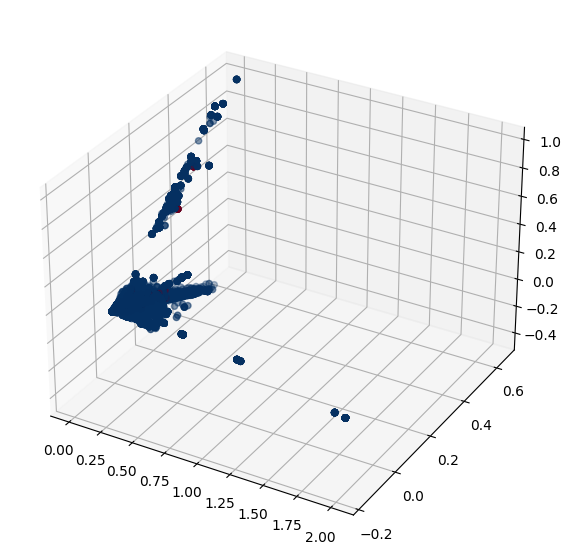

In [27]:
plot_clusters_3d(tsvd_3d_df)

## PCA vs TruncatedSVD

### 2D

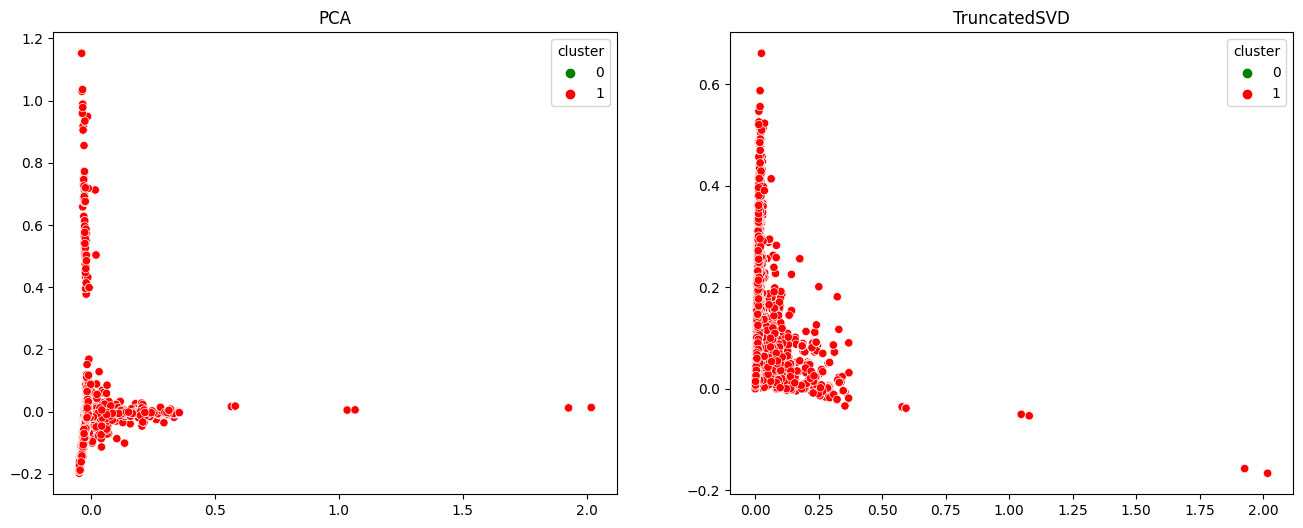

In [28]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('PCA')
ax1_sns = sns.scatterplot(
    data=pca_2d_df,
    x='x', 
    y='y', 
    hue='cluster', 
    palette=['green', 'red'], 
    ax=ax1
);
ax1_sns.set(xlabel=None);
ax1_sns.set(ylabel=None);

ax2.set_title('TruncatedSVD')
ax2_sns = sns.scatterplot(
    data=tsvd_2d_df, 
    x='x', 
    y='y', 
    hue='cluster',
    palette=['green', 'red'],
    ax=ax2
);
ax2_sns.set(xlabel=None);
ax2_sns.set(ylabel=None);

## 3D

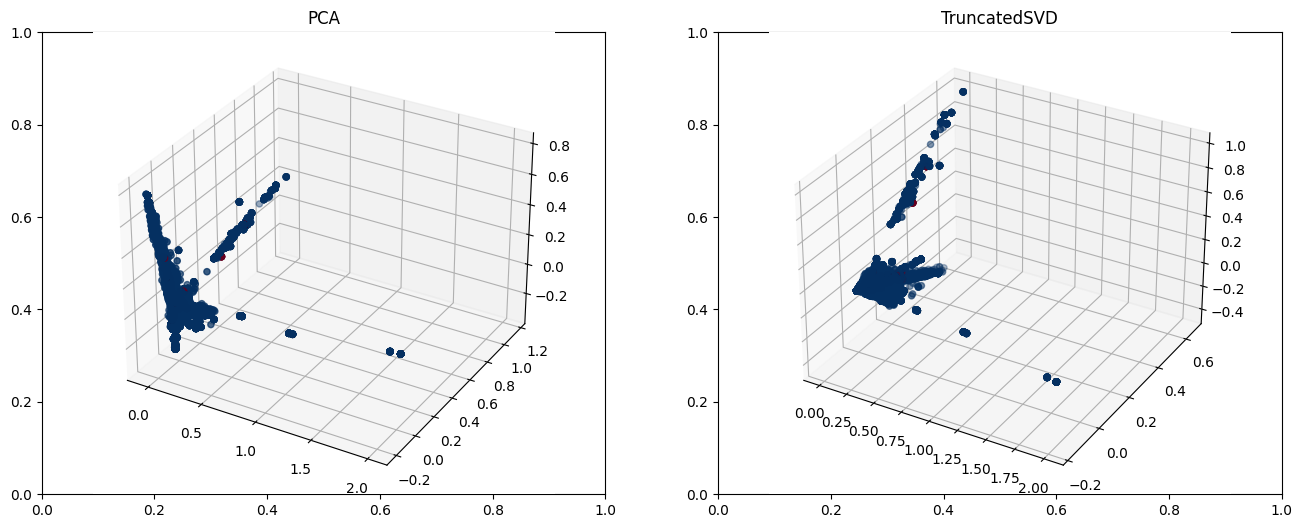

In [29]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('PCA')
ax11 = fig.add_subplot(1, 2, 1, projection='3d')
ax11.scatter(
    pca_3d_df['x'],
    pca_3d_df['y'],
    pca_3d_df['z'],
    marker='o',
    c=pca_3d_df['cluster'],
    s=20,
    cmap='RdBu'
);

ax2.set_title('TruncatedSVD')
ax22 = fig.add_subplot(1, 2, 2, projection='3d')
ax22.scatter(
    tsvd_3d_df['x'],
    tsvd_3d_df['y'],
    tsvd_3d_df['z'],
    marker='o',
    c=tsvd_3d_df['cluster'],
    s=20,
    cmap='RdBu'
);

## Pravi skup podataka

In [30]:
train_data = pd.read_csv('../../dataset/classification/train.csv')
test_data = pd.read_csv('../../dataset/classification/test.csv')

In [31]:
labels = pd.concat([train_data['label'], test_data['label']], axis=0)
labels.index = range(0, labels.shape[0])
labels

0        0
1        0
2        0
3        0
4        0
        ..
47321    0
47322    0
47323    0
47324    0
47325    0
Name: label, Length: 47326, dtype: int64

Zasto pozivamo metod `copy()`?  

Da smo dodelili `tsvd_2d_df` promenljivoj `true_data` to bi pokazivalo na istu adresu u memoriji, tj. istu promenljivu (Moze se proveriti pozivom `print(id(true_data), id(tsvd_2d_df))`). Naredni korak `true_data['cluster'] = labels` bi promenio kolonu `cluster` kako u DataFrame-u `true_data` tako i u DataFrame-u `tsvd_2d_df` pa bi nas grafik izgledao identicno jer prikazujemo 2 identicna DataFrame-a. Metod `copy()` vrsi [duboko kopiranje](https://www.geeksforgeeks.org/difference-between-shallow-and-deep-copy-of-a-class/) tako da se sada promena kolone `cluster` prikazuje samo u `true_data` DataFrame-u.

In [32]:
true_data = tsvd_2d_df.copy()
true_data['cluster'] = labels
true_data

,x,y,cluster
0,0.006638,0.047846,0
1,0.022881,0.099697,0
2,0.001880,0.024870,0
3,0.004545,0.043945,0
4,0.002032,0.021709,0
...,...,...,...
47321,0.004935,0.024306,0
47322,0.003211,0.025902,0
47323,0.001149,0.014309,0
47324,0.007287,0.057605,0


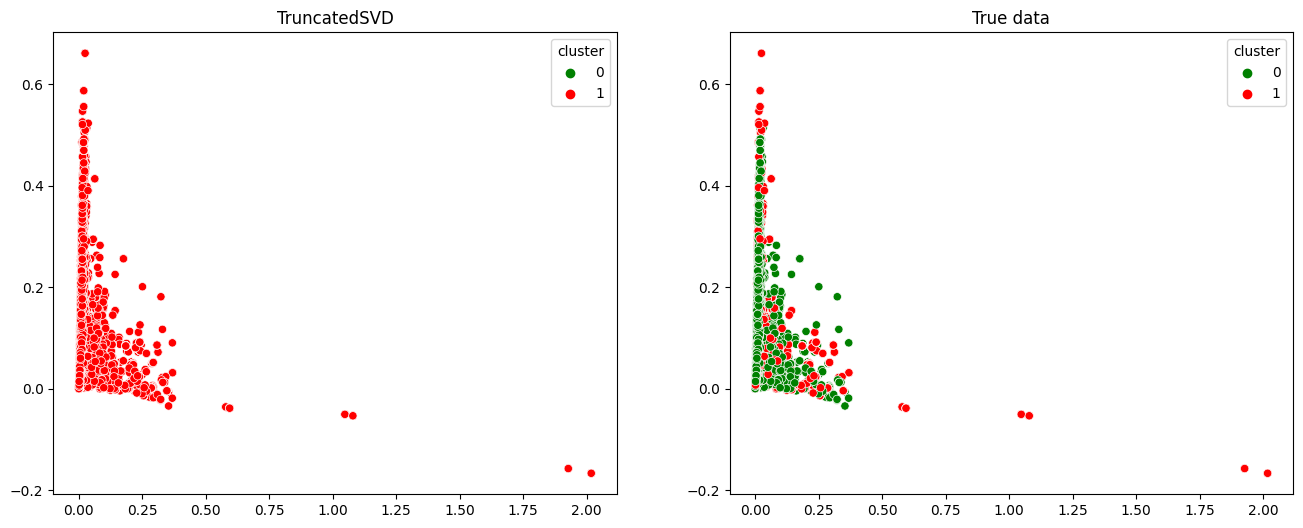

In [33]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('TruncatedSVD')
ax1_sns = sns.scatterplot(
    data=tsvd_2d_df,
    x='x', 
    y='y', 
    hue='cluster', 
    palette=['green', 'red'], 
    ax=ax1
);
ax1_sns.set(xlabel=None);
ax1_sns.set(ylabel=None);

ax2.set_title('True data')
ax2_sns = sns.scatterplot(
    data=true_data, 
    x='x', 
    y='y', 
    hue='cluster',
    palette=['green', 'red'],
    ax=ax2
);
ax2_sns.set(xlabel=None);
ax2_sns.set(ylabel=None);

## Izbor broja klastera

In [34]:
tsvd_choice = TruncatedSVD(n_components=2, random_state=42)
tsvd_choice_data = tsvd_choice.fit_transform(data)

Inertia(k=2): 79,277.6120
Inertia(k=12): 77,269.1790
Inertia(k=22): 76,273.7600
Inertia(k=32): 75,627.1298
Inertia(k=42): 73,361.6133
Inertia(k=52): 74,886.3552
Inertia(k=62): 71,725.9158
Inertia(k=72): 72,269.4605
Inertia(k=82): 70,270.3679
Inertia(k=92): 70,336.5695


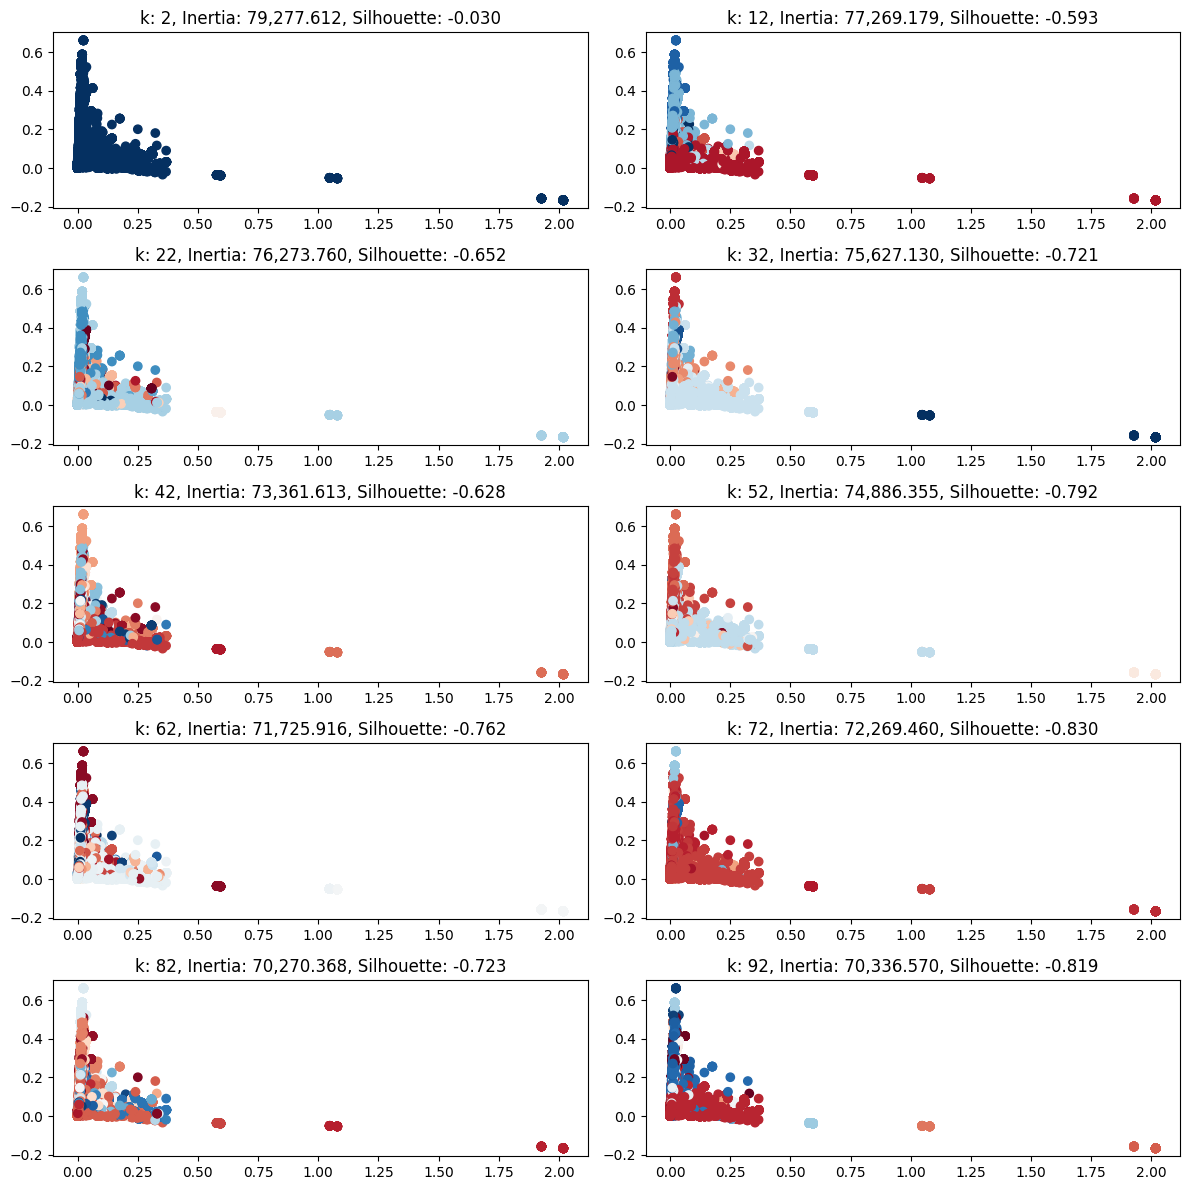

In [57]:
K = np.arange(2, 100, 10)
results = {}

(fig, axs) = plt.subplots(5, 2, figsize=(12, 12))

for (i, k) in enumerate(K):
    row = i // 2
    col = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    Y_kmeans = kmeans.fit_predict(data)

    silhouette = silhouette_score(tsvd_choice_data, kmeans.labels_)
    inertia = kmeans.inertia_
    print(f'Inertia(k={k}): {inertia:,.4f}')

    results[k] = {
        'inertia': inertia,
        'silhouette': silhouette
    }

    ax = axs[row, col]
    ax.scatter(tsvd_choice_data[:, 0], tsvd_choice_data[:, 1], c=Y_kmeans, cmap='RdBu')
    ax.set_title(f'k: {k}, Inertia: {inertia:,.3f}, Silhouette: {silhouette:,.3f}')
    

plt.tight_layout()
plt.show()

In [60]:
ks = list(results.keys())
inertias = [results[key]['inertia'] for key in results]
silhouettes = [results[key]['silhouette'] for key in results]

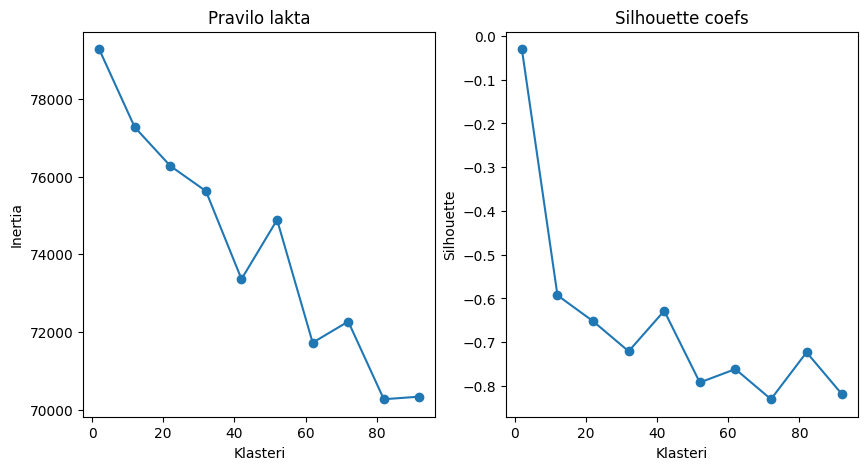

In [63]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('Inertia')
plt.xlabel('Klasteri')
plt.title('Pravilo lakta')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker="o")
plt.ylabel('Silhouette')
plt.xlabel('Klasteri')
plt.title('Silhouette coefs')

plt.show()

Pravilo lakta bi nam dalo da je najbolji model za 62 klastera jer tada SSE najbrse opada.  
Medjutim Silhouette koeficijent nam govori da sa porastom broja klastera opada koherencija unutar klastera kao i separacija izmedju klastera, pa ce najbolji model biti za 2 klastera

## Cuvanje najboljeg modela

In [64]:
best_model = KMeans(n_clusters=2, init='k-means++', n_init='auto')
best_model.fit(data)

KMeans(n_clusters=2, n_init='auto')

In [65]:
joblib.dump(best_model, 'k_means.joblib')

['k_means.joblib']